Load the `ISLR2` and `tidyverse` packages.

In [9]:
library(ISLR2)
library(tidyverse)
library(tidymodels)



-- Attaching packages -------------------------------------- tidymodels 1.1.0 --

v broom        1.0.5     v rsample      1.1.1
v dials        1.2.0     v tune         1.1.1
v infer        1.0.4     v workflows    1.1.3
v modeldata    1.1.0     v workflowsets 1.0.1
v parsnip      1.1.0     v yardstick    1.3.1
v recipes      1.0.6     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x dplyr::filter()   masks stats::filter()
x recipes::fixed()  masks stringr::fixed()
x dplyr::lag()      masks stats::lag()
x yardstick::spec() masks readr::spec()
x recipes::step()   masks stats::step()
* Learn how to get started at https://www.tidymodels.org/start/



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [6]:

Auto_data = ISLR2::Auto
Auto_data |>
glimpse()

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2~
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, ~
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34~
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16~
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385~
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, ~
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7~
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, ~
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa~


Plot `mpg`  as a function of `displacement`.

`geom_smooth()` using formula = 'y ~ x'


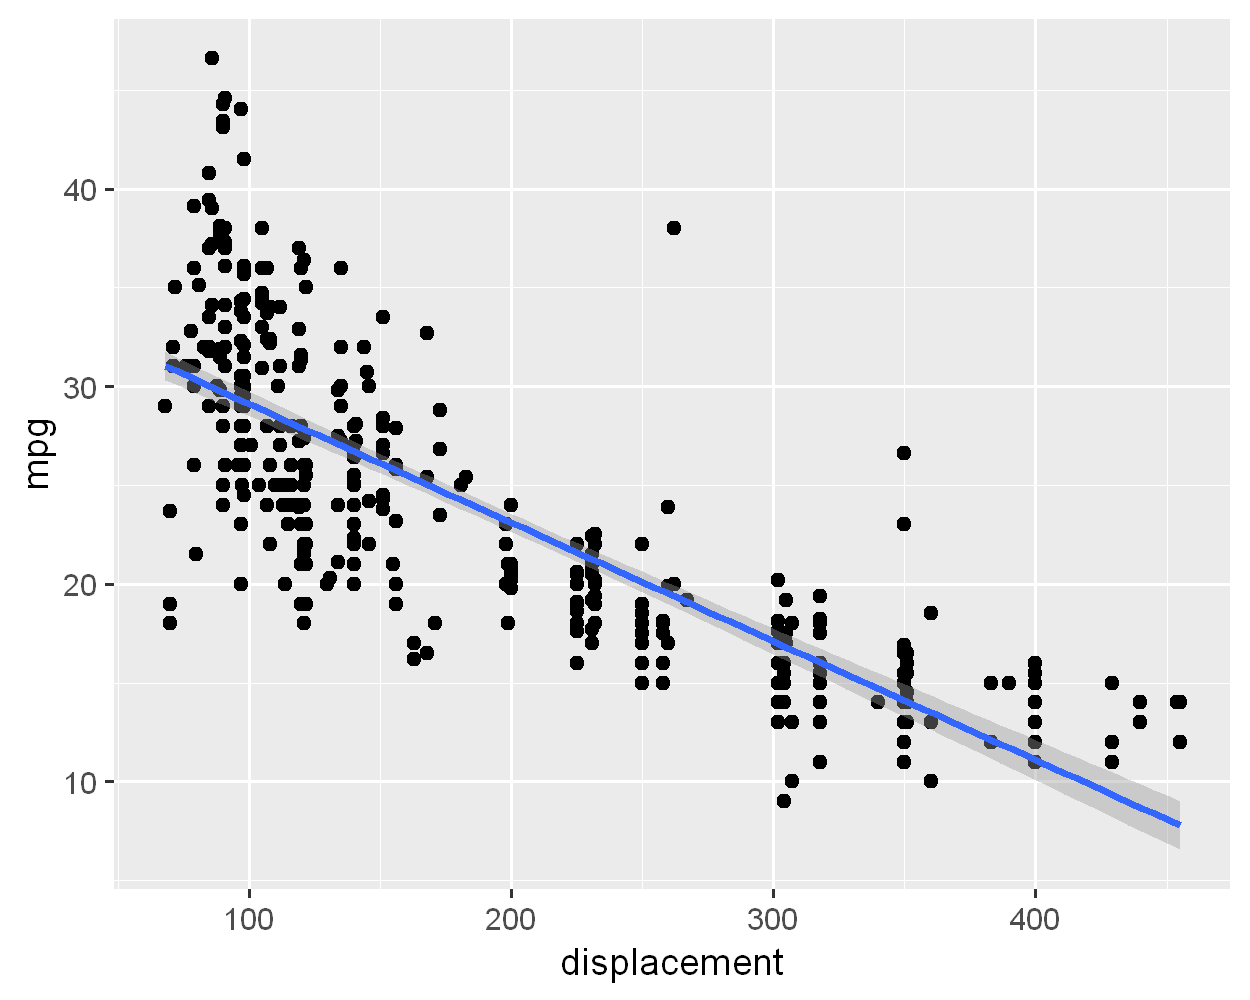

In [7]:
ggplot(Auto_data, aes(y = mpg, x = displacement)) +
    geom_point() +
    stat_smooth(method = "lm")



❓Does the relationship of `mpg` to `displacement` look linear?

not a completely linear relationship. There is some clustering and a higher distribution on the lower end of X and then a leveling off on the higher X values. 

This makes sense with the larger amount of lower cylinder model vehicles and the wide varieties of mpg efficencies at play.
Generally, there is a negative relationship. As Discplacement - X increases, mpg - Y decreases. 



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [18]:
rec <- recipe(mpg ~ displacement + cylinders, data = Auto) |>
  step_poly(displacement, degree = 2) |> 
  step_mutate(cyl_cat = factor(cylinders)) |>
  step_dummy(cyl_cat) |>
  step_rm(cylinders) |>
  prep()


poly_data <- juice(rec)

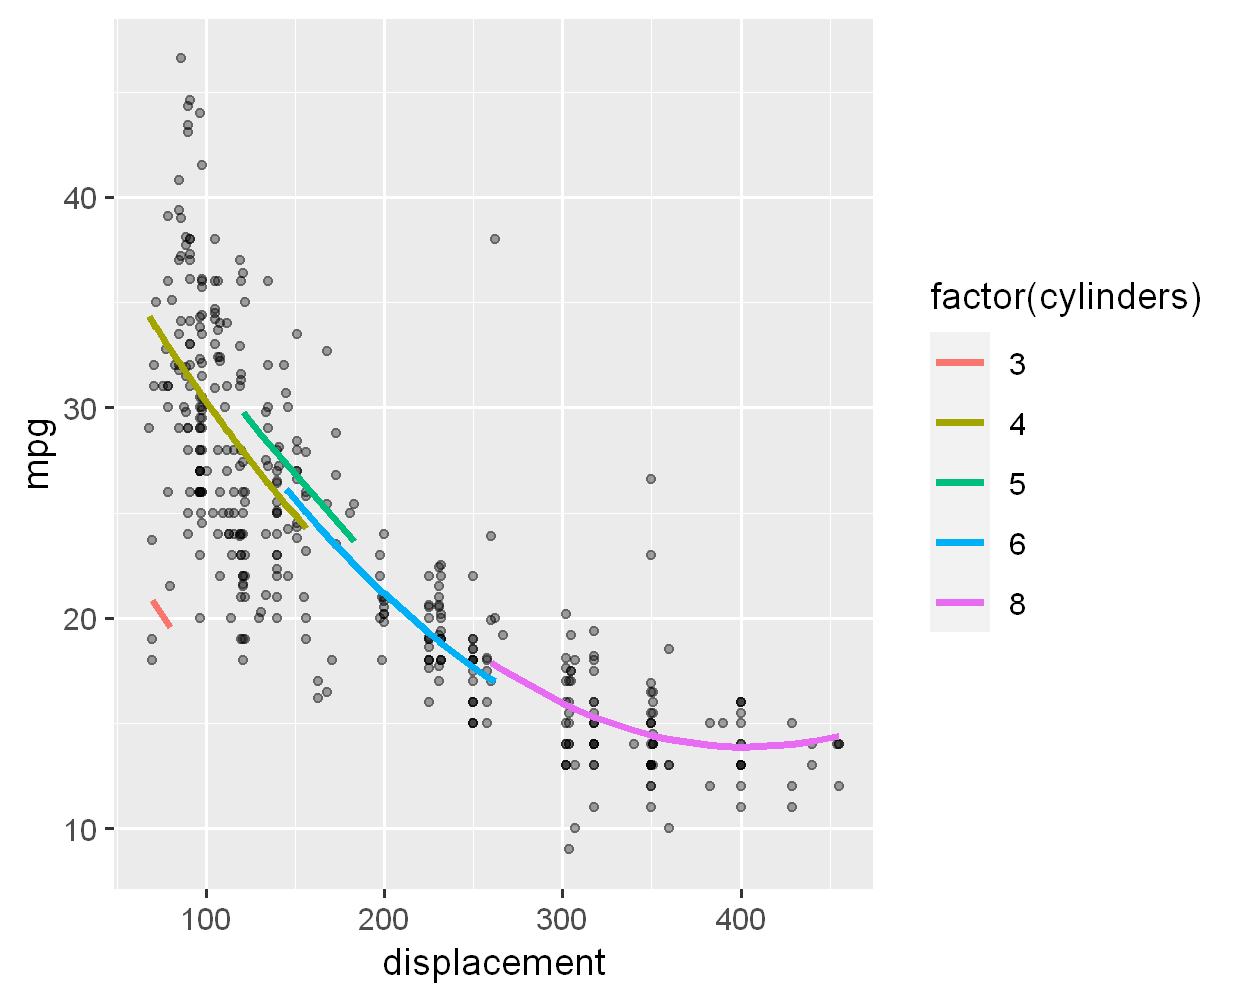

In [19]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())

predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)

